<a href="https://colab.research.google.com/github/Vicrrs/Naive_Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset de anuncios em mídias sociais, ele mostra usuarios que viram determinado anuncio em uma rede social e se eles compraram ou não os produtos. 1- comprou, 0- nao comprou

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")

In [4]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## A plicando Label Encoder na coluna Gender

In [5]:
colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

# Fazendo o Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols:
  le.fit(dados[i])
  dados[str(i) + '_encoded'] = le.transform(dados[i])

In [6]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [7]:
dados = dados.drop("Gender", axis=1)

In [8]:
dados.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


## Quebrando a base em treino e teste

In [10]:
x = dados.drop('Purchased', axis=1)
y = dados['Purchased']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Carregando o Modelo

Na nossa base temos dados de clientes +  a informação se ele comprou um anúncio oferecido em rede social ou não. Usaremos o Naive Bayes para fazer essa previsão.

### Treinando o modelo

In [13]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(x_train, y_train)

GaussianNB()

## Fazendo a Previsão

In [14]:
y_pred = modelo.predict(x_test)

In [15]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

## Avaliando o Resultado

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8833333333333333


## Conclusão

O modelo teve uma performance de 88% na acurácia
Isso quer dizer que a taxa de acerto foi muito alta, para uma avaliação adicional, vamo fazer uma matriz de confusão para entender onde estão estes acertos e erros.

## Matriz de Confusão

Vai pegar todas as situações possiveis de acontecer e todas as situações que o modelo previl e comparar por quadrantes.

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[73,  0],
       [14, 33]])

Text(33.0, 0.5, 'y_pred')

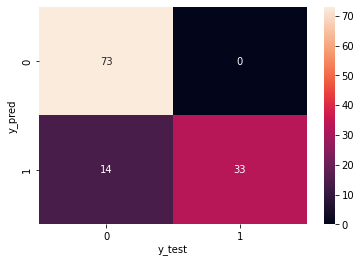

In [18]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

- 73 registros certos (a pessoa n comprou)
- 0 registros errados modelo foi muito bom acertou todas as vezes que ele disse que uma pessoa nao compraria
- 14 erradas dizendo que compraria mas na verdade nao comprou
- 33 quando a pessoa compraria

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision score, calcula quantos foram classificados corretamente com positivos TP -> {precision_score(y_test, y_pred)}")
print(f"Recall score, calcula o quão bom o modelo esta para classificar corretamente um resultado positivo TP -> {recall_score(y_test, y_pred)}")
print(f"F1 score, core é uma métrica para identificar se algum dos valores de recall ou de precisão estão baixos, uma vez que não é muito interessante ter \n um modelo com um alto recall e pouca precisão, ou vice-versa -> {f1_score(y_test, y_pred)}")

Precision score, calcula quantos foram classificados corretamente com positivos TP -> 1.0
Recall score, calcula o quão bom o modelo esta para classificar corretamente um resultado positivo TP -> 0.7021276595744681
F1 score, core é uma métrica para identificar se algum dos valores de recall ou de precisão estão baixos, uma vez que não é muito interessante ter 
 um modelo com um alto recall e pouca precisão, ou vice-versa -> 0.825
